# FEDERATED LEARNING FROM BIG DATA OVER NETWORKS 


## NUMERICALEXPERIMENTS

To empirically evaluate the accuracy of Algorithm 1, we used multiple experiments. First, we apply it to a synthetic dataset. We generate the empirical graph G using the stochastic block model with two clusters, and Also four clusters which are examples of the section 4.1 . As a real-world experiment we choose 3D Road Network dataset, representing the topography of a Danish road networks, is obtained from a free repository 3D Road Network (North Jutland, Denmark) Data Set from https://archive.ics.uci.edu/ml/datasets/3D+Road+Network+\%28North+Jutland\%2C+Denmark\%29. 

And the third experiment, related to the future of our work, is based on a deep learning model to classify photos of dogs and cats, it contains a pre-trained Xception as its base model and some added layers (a Global Average Pooling 2D, a Dropout, and a Dense layer with linear activation).


### 1. Stochastic Block Model

Two nodes within the same cluster of the empirical graph are connected by an edge with probability pin, Two nodes from different clusters are connected by an edge with probability pout. Each node $i \in V$ represents a local dataset consisting of 5 feature vectors $x^{(i,1)}, ... , x^{(i,5)} \in R^2$. The feature vectors are i.i.d. realizations of a standard Gaussian random vector x ∼ N(0,I). The labels $y_1^{(i)}, . . . , y_5^{(i)} \in R$ of the nodes $i \in V$ are generated according to the linear model $y_r^{(i)} = (x^{(i, r)})^T w^{(i)}$ . To learn the weight $w^{(i)}$ ,we apply Algorithm 1 to a training set M obtained by randomly selecting 20% of nodes.

#### 1.1 Two Clusters

The size of the clusters are {150, 150} with the weight vector $w^{(i)} = (􏰁2, 2)^T $ for $i \in C_1$ and $w^{(i)} = 􏰁(−2,2)^T$ for $i \in C_2$. We run Algorithm 1 for different choices of $pout$ with a fixed $pin = 1/2$.

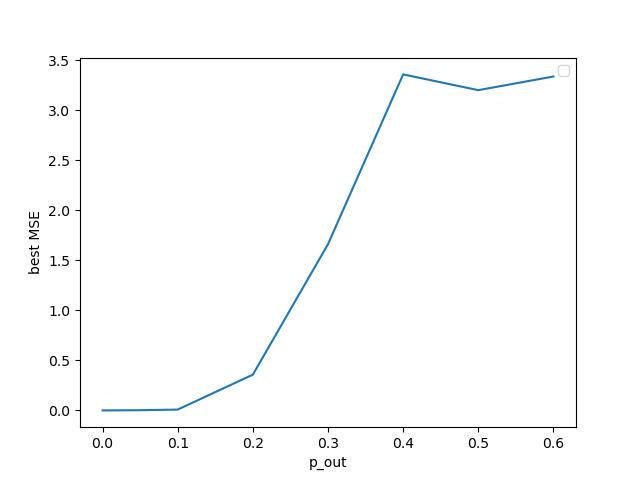

In [1]:
from IPython.display import Image
Image(filename='pout_mse.png', width=400) 

By fixing $pout = 10^{−3}$, we run Algorithm 1 for different choices of $\lambda$ and a fixed number of 500 iterations. We measure the quality of the learnt weight vectors $\hat{w}^{(i)}$ by the mean-squared error (MSE). The tuning parameter $\lambda$ is manually chosen, guided by the resulting MSE, as $\lambda = 10^{−3}$. 



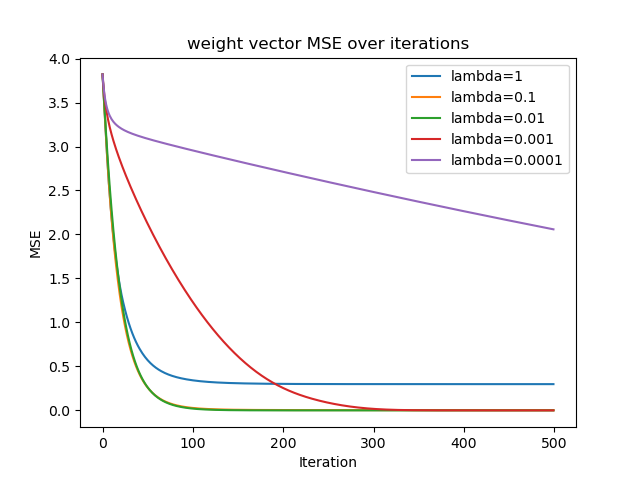

In [2]:
Image(filename='compare_mse.png', width=400) 

We compare the MSE of Algorithm 1 with plain linear regression and decision tree regression at the following.

In [3]:
from regression_lasso.reg_sbm import run_reg_sbm_2blocks

iteration_scores, our_score, linear_regression_score, decision_tree_score = run_reg_sbm_2blocks(K=500, lambda_lasso=0.001, m=5, n=2)

print('our method training MSE:        ', our_score['train']['mean_squared_error'], 
      ', our method test MSE:      ', our_score['test']['mean_squared_error'])

print('linear regression training MSE: ', linear_regression_score['train']['mean_squared_error'], 
      '   , linear regression test MSE: ', linear_regression_score['test']['mean_squared_error'])


print('decision tree training MSE:     ', decision_tree_score['train']['mean_squared_error'], 
      '   , decision tree test MSE:      ', decision_tree_score['test']['mean_squared_error'])

our method training MSE:         2.4005881145709436e-06 , our method test MSE:         2.595937908738259e-06
linear regression training MSE:  4.2157529156051305    , linear regression test MSE:  3.950037400833017
decision tree training MSE:      4.407057121269793    , decision tree test MSE:      4.58145659192158


#### 1.2 Four Clusters


The size of the clusters are {70, 10, 50, 100, 150} with random weight vectors $\in R^2$ selected uniformly from [0, 1). We run Algorithm 1 with a fixed $pin = 1/2$ and $pout = 10^{−3}$, and a fixed number of 500 iterations. The tuning parameter $\lambda$ is manually chosen, guided by the resulting MSE, as $\lambda = 10^{−3}$. 

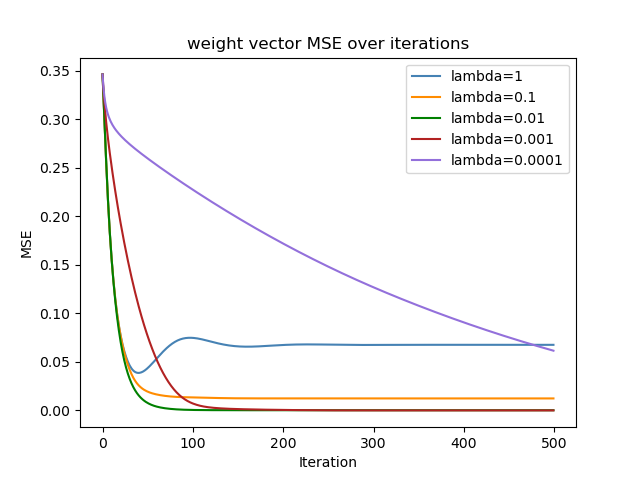

In [4]:
Image(filename='4_compare_mse.png', width=400) 

We compare the MSE of Algorithm 1 with plain linear regression and decision tree regression.

In [5]:
from regression_lasso.reg_sbm import run_reg_sbm_4blocks

iteration_scores, our_score, linear_regression_score, decision_tree_score = run_reg_sbm_4blocks(K=500, lambda_lasso=0.001, m=5, n=2)

print('our method training MSE:        ', our_score['train']['mean_squared_error'], 
      ', our method test MSE:        ', our_score['test']['mean_squared_error'])

print('linear regression training MSE: ', linear_regression_score['train']['mean_squared_error'], 
      '   , linear regression test MSE: ', linear_regression_score['test']['mean_squared_error'])


print('decision tree training MSE:     ', decision_tree_score['train']['mean_squared_error'], 
      '   , decision tree test MSE:     ', decision_tree_score['test']['mean_squared_error'])

our method training MSE:         2.631467027488772e-06 , our method test MSE:         3.3670286211993993e-06
linear regression training MSE:  0.20331308786686217    , linear regression test MSE:  0.2275376325959197
decision tree training MSE:      0.3707737953249807    , decision tree test MSE:      0.4334684383658888


### 2. 3D Road Network Dataset

This dataset is constructed by adding elevation information to a $2D$ road network in North Jutland, Denmark (covering a region of $185 \times 135$ $km^2$), containing $LATITUDE$, $LONGITUDE$, and also $ALTITUDE$ of regions. In this experiment, we combined each 5 nearest regions to one we consider a graph G represents this dataset, which its nodes are is initially We combined each 5 nearest regions to one node which are connected by edges to their nearby neighbours with the weights that are related to the distances between the nodes. So the feature vector ${\bf X}^{(i)} \in R^{5 \times 2}$ of node $i \in \mathcal{V}$ contains the latitude and longitude of the combined regions, and the label ${\bf y}^{(i)} \in R^5$ is their altitudes. 

We use Algorithm 1 to learn the weight vectors ${\bf w}^{(i)}$ for a localized linear model. We assume that labels ${\bf y}^{(i)}$ are available for $70\%$ if the graph nodes, thus, for $30\%$ of the nodes in G we do not know the 
labels ${\bf y}^{(i)}$ but predict them with the weight vectors $\hat{\bf w}^{(i)}$ obtained from Algorithm 1 (using a fixed number of $1000$ iterations, $\lambda=0.1$). 

We compare the prediction MSE and NMSE of our method with simple linear regression and decision tree regression.



In [6]:
from regression_lasso.reg_merge_3d_road import run_reg_merge_3d_road

iteration_scores, our_score, linear_regression_score, decision_tree_score = run_reg_merge_3d_road()

print('our method MSE:        ', our_score['total']['mean_squared_error'], 
      '    , our method NMSE:        ', our_score['total']['normalized_mean_squared_error'])

print('linear regression MSE: ', linear_regression_score['total']['mean_squared_error'], 
      '   , linear regression NMSE: ', linear_regression_score['total']['normalized_mean_squared_error'])


print('decision tree NMSE:    ', decision_tree_score['total']['mean_squared_error'], 
      '    , decision tree NMSE:     ', decision_tree_score['total']['normalized_mean_squared_error'])

our method MSE:         190.10440858235572     , our method NMSE:         0.2290859955412055
linear regression MSE:  338.6351102466087    , linear regression NMSE:  0.4080734472943222
decision tree NMSE:     319.9630516100997     , decision tree NMSE:      0.38557261644328306


### 3. Networked Federated Deep Learning

In this experiment, we use a number of trained deep neural networks - in which the first layers are obtained from pre-training Xception model, with 132 layers, on the ImageNet dataset with added a Global Average Pooling 2D, a Dropout, and a Dense layer with linear activation - as local models. Each local dataset is assigned a deep net whose last dense layer have trainable weights and its dataset is the Tensorflow ”cats vs dogs” dataset. 
Each node of the emprical graph corresponds to a trained model with different train sets from the Tensorflow ”cats vs dogs” classification dataset. For each node i, its dataset contains a train set which is 75% of the total dataset and a validation set is 15% of the total dataset, ${\bf w}^{(i)}$ is the weight vector of its Dense layer, and ${\bf x}^{(i,r)}$ is the result of the Xception model for each train image r in its training set, and also ${\bf y}^r$ is the result of the original model for that image.

The total number of nodes is 100 and each node is connected to its 3 nearest neighbours, the ones with the most common training images, and the weight of each edge is the ratio of the number of similar train images between its nodes to the total number of train data. We select 20 random nodes and trained the model based on their train sets. We learn localized models using Algorithm 1 with $\lambda = 0.001$ and a fixed number of 1000 iterations. We depict the resulting accuracy for each local dataset at the following. 


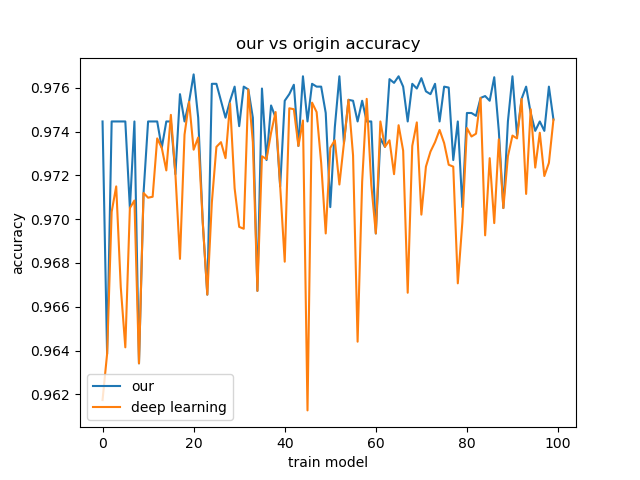

In [7]:
Image(filename='train_accuracy_0.001.png', width=600) 

Our method has increased the overall accuracy of the nodes in a significant shorter time, the needed time for training each model with three learning epochs is almost 20 minutes, so training 100 models lasts 2000 minutes, while the needed time for our algorithm is less than 2 minutes by adding the time for training the sampling set, which is 20 nodes, the total needed time would be 402 minutes (402 << 2000).